# Data-Clean (Cuong's Session)

## Import CSV file 

In [1]:
import pandas as pd
import numpy as np
import math

test_pd = pd.read_csv('SuperCenterDataNew.csv', header=None, dtype=str)
# add dtype to prevent float
test_pd.head()
print(len(test_pd))
print (test_pd.head)

36881
<bound method NDFrame.head of          0     1     2     3      4      5      6      7      8     9   ...  \
0        39    48   130   147    475   2998   4792   5478   7146  7160  ...   
1        32    48   NaN   NaN    NaN    NaN    NaN    NaN    NaN   NaN  ...   
2        48    79   232   340    396    649    911   1016   1020  1172  ...   
3        32    48    65   130    772    816   1344   3220   4445  6536  ...   
4        39   175   421   806   1025   1629   2424   3151    NaN   NaN  ...   
...     ...   ...   ...   ...    ...    ...    ...    ...    ...   ...  ...   
36876    39   875  2665  2962  12959  14070  14406  15518  16379   NaN  ...   
36877    39    41   101   346    393    413    479    522    586   635  ...   
36878  2310  4267   NaN   NaN    NaN    NaN    NaN    NaN    NaN   NaN  ...   
36879    39    48  2528   NaN    NaN    NaN    NaN    NaN    NaN   NaN  ...   
36880    32    39   205   242   1393    NaN    NaN    NaN    NaN   NaN  ...   

        66   67

## check whether the dataframe has empty rows or not 

In [2]:
def check_blank_rows(df):
    # find rows that all cells are empty or Nan
    blank_rows = df[df.apply(lambda row: row.isnull().all() or (row.astype(str).str.strip() == '').all(), axis=1)]
    
    if blank_rows.empty:
        print("✅ No empty lines.")
    else:
        print(f"⚠️ Found {len(blank_rows)} empty rows")
        print(blank_rows)

    return blank_rows

check_blank_rows(test_pd)

✅ No empty lines.


,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75


## Change the format of dataset from pandas.dataframe to pandas.Series

In [3]:
def is_not_nan(x):
    return x is not None and not (isinstance(x, float) and math.isnan(x))

def merge_and_clean(df):
    # Combine all the value into list, remove NaN cells
    def row_to_clean_list(row):
        # row là 1 Series
        items = []
        for cell in row:
            if isinstance(cell, list):
                items.extend([v for v in cell if is_not_nan(v)])
            elif is_not_nan(cell):
                items.append(int(cell))
        return items

    # Apply for each line
    return df.apply(row_to_clean_list, axis=1)

cleaned = merge_and_clean(test_pd)

# Print result
print(cleaned)
print(type(cleaned))

0        [39, 48, 130, 147, 475, 2998, 4792, 5478, 7146...
1                                                 [32, 48]
2        [48, 79, 232, 340, 396, 649, 911, 1016, 1020, ...
3        [32, 48, 65, 130, 772, 816, 1344, 3220, 4445, ...
4              [39, 175, 421, 806, 1025, 1629, 2424, 3151]
                               ...                        
36876    [39, 875, 2665, 2962, 12959, 14070, 14406, 155...
36877    [39, 41, 101, 346, 393, 413, 479, 522, 586, 63...
36878                                         [2310, 4267]
36879                                       [39, 48, 2528]
36880                             [32, 39, 205, 242, 1393]
Length: 36881, dtype: object
<class 'pandas.core.series.Series'>


In [5]:
def check_all_integers_series(series):
    # function to test integer in the list
    def is_all_int(item_list):
        if not isinstance(item_list, list):
            return False
        return all(isinstance(x, int) for x in item_list)

    # apply test
    invalid_rows = series[~series.apply(is_all_int)]

    if invalid_rows.empty:
        print("✅ All elements are lists with integer particles")
    else:
        print(f"⚠️ Found {len(invalid_rows)} invalid particles")
        print(invalid_rows)

    return invalid_rows

check_all_integers_series(cleaned)

✅ All elements are lists with integer particles


Series([], dtype: object)

### Check duplicate particles in the list of each cart 

In [6]:
def check_duplicate_elements_in_series(series):
    # Return True if the list : lst contain duplication
    def has_duplicates(lst):
        if not isinstance(lst, list):
            return False
        return len(lst) != len(set(lst))  # If exist duplication: len(set()) < len(lst)

    # Apply the check for each row
    duplicated_rows = series[series.apply(has_duplicates)]

    if duplicated_rows.empty:
        print("✅ No duplicated row found.")
    else:
        print(f"⚠️ Found {len(duplicated_rows)} list exist duplication:")
        print(duplicated_rows)

    return duplicated_rows


check_duplicate_elements_in_series(cleaned)

✅ No duplicated row found.


Series([], dtype: object)

## Function to check distribution (existence of item in each cart)

In [7]:
distribution = cleaned.explode().value_counts()

print(distribution)
top_100 = distribution.head(100)

39       21381
48       17930
38        6495
32        6267
41        4391
         ...  
15753        1
14512        1
6240         1
4533         1
16469        1
Name: count, Length: 11799, dtype: int64


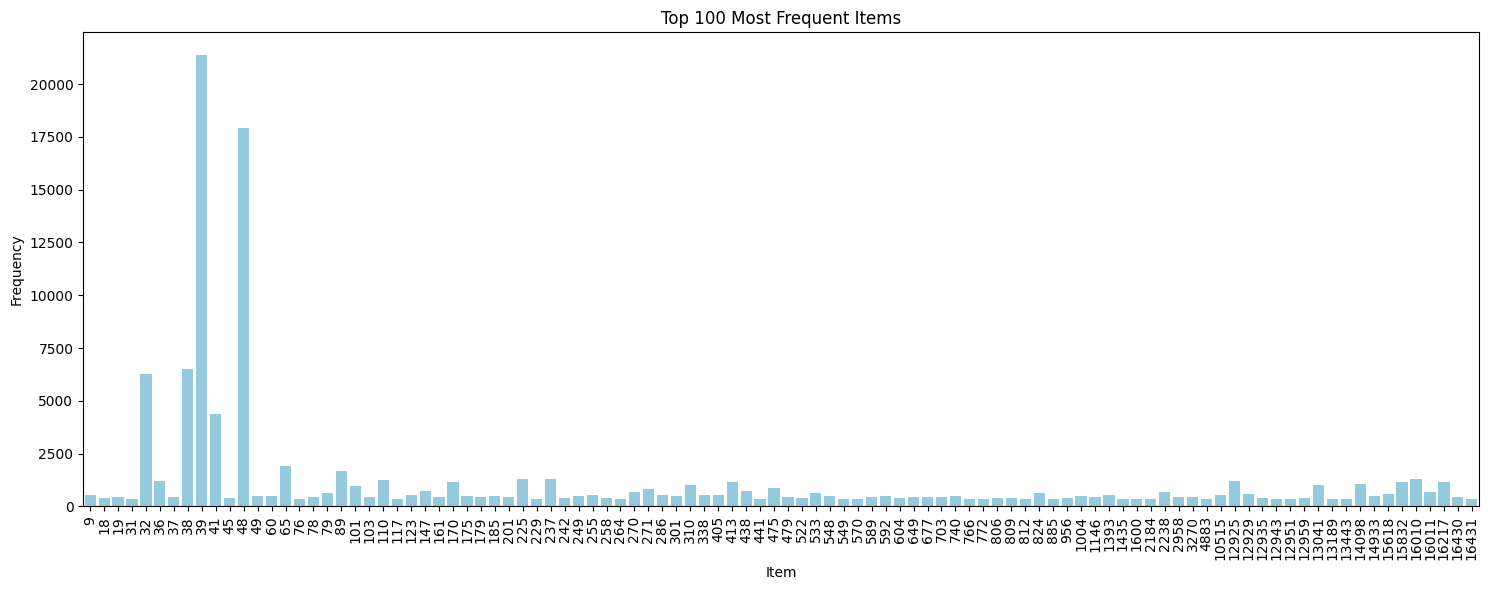

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.barplot(x=top_100.index, y=top_100.values, color='skyblue')

plt.title('Top 100 Most Frequent Items')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
print(cleaned)
cleaned_df = pd.DataFrame({'transaction_id': cleaned.index, 
                          'item': cleaned.values}) # Convert the data cleaned from Series -> familiar pandas format
cleaned_df


0        [39, 48, 130, 147, 475, 2998, 4792, 5478, 7146...
1                                                 [32, 48]
2        [48, 79, 232, 340, 396, 649, 911, 1016, 1020, ...
3        [32, 48, 65, 130, 772, 816, 1344, 3220, 4445, ...
4              [39, 175, 421, 806, 1025, 1629, 2424, 3151]
                               ...                        
36876    [39, 875, 2665, 2962, 12959, 14070, 14406, 155...
36877    [39, 41, 101, 346, 393, 413, 479, 522, 586, 63...
36878                                         [2310, 4267]
36879                                       [39, 48, 2528]
36880                             [32, 39, 205, 242, 1393]
Length: 36881, dtype: object


,transaction_id,item
0,0,"[39, 48, 130, 147, 475, 2998, 4792, 5478, 7146..."
1,1,"[32, 48]"
2,2,"[48, 79, 232, 340, 396, 649, 911, 1016, 1020, ..."
3,3,"[32, 48, 65, 130, 772, 816, 1344, 3220, 4445, ..."
4,4,"[39, 175, 421, 806, 1025, 1629, 2424, 3151]"
...,...,...
36876,36876,"[39, 875, 2665, 2962, 12959, 14070, 14406, 155..."
36877,36877,"[39, 41, 101, 346, 393, 413, 479, 522, 586, 63..."
36878,36878,"[2310, 4267]"
36879,36879,"[39, 48, 2528]"


# Apriori's Algorithm Implementation
- The Clean Data was storing in `cleaned_df` variable - it's better for you to have the back-up of stored cleaned csv file of this dataframe obj

## Cuong's Session (TROY-ID NUMBER)

In [ ]:
"""
Commentarty Section (Necessary)

Provide a brief commentary describing what your code is intended to implement. Focus on the main logic or algorithm behind it. You may include a high-level overview or pseudocode to outline the steps. This helps clarify your thought process before writing the actual code.

Example:

    This function sorts a list using the Bubble Sort algorithm. It repeatedly steps through the list, compares adjacent items, and swaps them if they’re in the wrong order.
    
    Pseudocode:
    for i from 0 to n:
        for j from 0 to n-i-1:
            if arr[j] > arr[j+1]:
                swap(arr[j], arr[j+1])

"""

## An's Session (TROY-ID NUMBER)

In [ ]:
"""
Commentarty Section (Necessary)

Provide a brief commentary describing what your code is intended to implement. Focus on the main logic or algorithm behind it. You may include a high-level overview or pseudocode to outline the steps. This helps clarify your thought process before writing the actual code.

Example:

    This function sorts a list using the Bubble Sort algorithm. It repeatedly steps through the list, compares adjacent items, and swaps them if they’re in the wrong order.
    
    Pseudocode:
    for i from 0 to n:
        for j from 0 to n-i-1:
            if arr[j] > arr[j+1]:
                swap(arr[j], arr[j+1])

"""

## Dung's Session (TROY-ID NUMBER)

In [ ]:
"""
Commentarty Section (Necessary)

Provide a brief commentary describing what your code is intended to implement. Focus on the main logic or algorithm behind it. You may include a high-level overview or pseudocode to outline the steps. This helps clarify your thought process before writing the actual code.

Example:

    This function sorts a list using the Bubble Sort algorithm. It repeatedly steps through the list, compares adjacent items, and swaps them if they’re in the wrong order.
    
    Pseudocode:
    for i from 0 to n:
        for j from 0 to n-i-1:
            if arr[j] > arr[j+1]:
                swap(arr[j], arr[j+1])

"""

## Dat's Session (1677589)

In [ ]:
"""
Commentarty Section (Necessary)

Provide a brief commentary describing what your code is intended to implement. Focus on the main logic or algorithm behind it. You may include a high-level overview or pseudocode to outline the steps. This helps clarify your thought process before writing the actual code.

Example:

    This function sorts a list using the Bubble Sort algorithm. It repeatedly steps through the list, compares adjacent items, and swaps them if they’re in the wrong order.
    
    Pseudocode:
    for i from 0 to n:
        for j from 0 to n-i-1:
            if arr[j] > arr[j+1]:
                swap(arr[j], arr[j+1])

"""